In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
fruits=pd.read_csv("E:/Python Programs/fruits.csv")
X = fruits[["sphericity", "weight"]]
y = fruits["label"]

In [3]:
encoding = LabelEncoder()
y = pd.Series(encoding.fit_transform(y))

In [4]:
# 0 means Apple
# 1 means Orange

y.value_counts()

1    30
0    30
Name: count, dtype: int64

In [5]:
# Note - "n_estimators=5" means it will create 5 Decision trees
# Note - "Sample count" & "value count" will not match if you observe in plot_tree because it is using
#         Bootstrap sampling i.e., sampling with replacement.
# "Sample count" is unique, but "value count" is not unique
# If you set the parameter "bootstrap = False", then it will not repeat the samples (i.e.,Sampling without replacement)
# Then in this case the "Sample count" & "value count" will match.
# Note - There is a relation between the parameters "bootstrap" and "max_samples". i.e., without setting 
#        "bootstrap = True", you cannot set the "max_samples" parameter.
# Note - If you set the parameter "bootstrap = False", then it is of no use because each time it will create 
#        same Decision tree.

model = RandomForestClassifier(n_estimators=5, criterion="entropy", bootstrap=True, max_samples=40)
model.fit(X,y)

RandomForestClassifier(criterion='entropy', max_samples=40, n_estimators=5)

In [6]:
estimators = model.estimators_
estimators

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=712290375),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1652567967),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=269534723),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=508221899),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1115013128)]

In [7]:
# These estimators are all individual learners and there is no connection between them. i.e., just like "Weak Laerners"

estimators[0].score(X,y), estimators[1].score(X,y), estimators[2].score(X,y), estimators[3].score(X,y), estimators[4].score(X,y)

(1.0, 0.9333333333333333, 0.9, 0.9833333333333333, 0.9166666666666666)

In [8]:
# When combine results of all "weak learners" together, then the overall model predicted score for better accuracy. 

model.score(X,y)

0.9833333333333333

In [9]:
estimators[0].predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
estimators[1].predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [11]:
estimators[2].predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [12]:
estimators[3].predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [13]:
estimators[4].predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [14]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

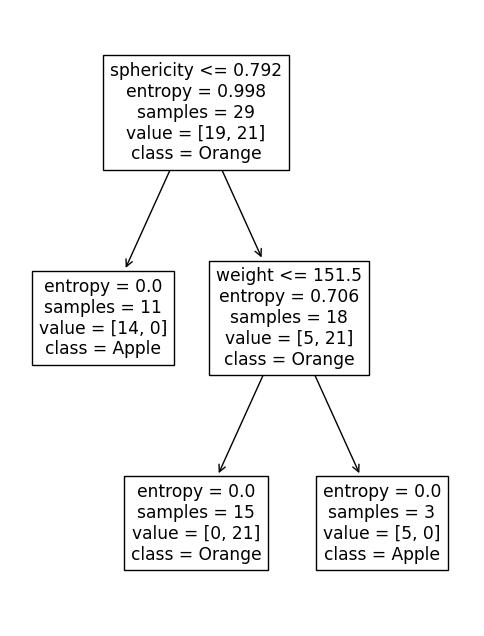

In [15]:
plt.figure(figsize=[6,8])
plot_tree(estimators[0], feature_names=X.columns, class_names=["Apple", "Orange"])
plt.show()

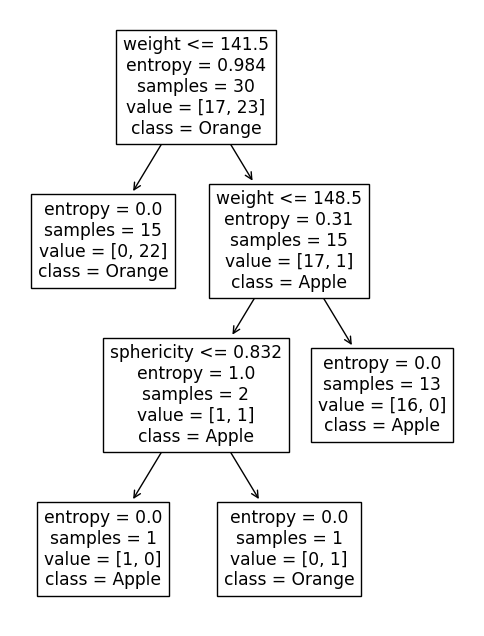

In [16]:
plt.figure(figsize=[6,8])
plot_tree(estimators[1], feature_names=X.columns, class_names=["Apple", "Orange"])
plt.show()

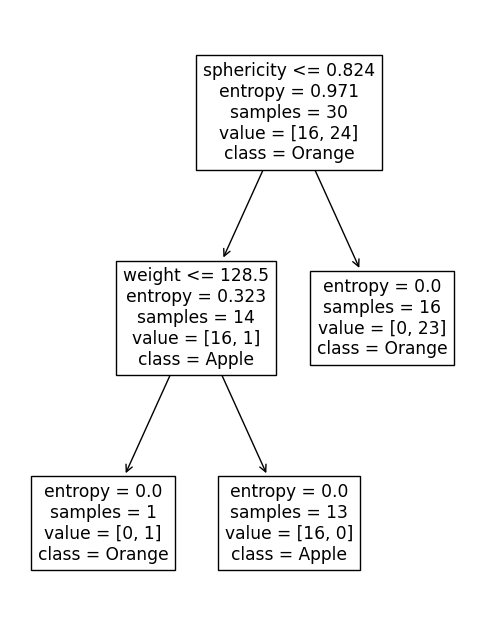

In [17]:
plt.figure(figsize=[6,8])
plot_tree(estimators[2], feature_names=X.columns, class_names=["Apple", "Orange"])
plt.show()

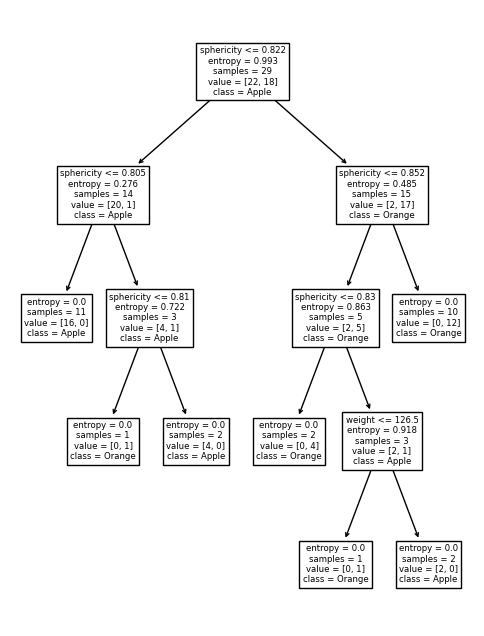

In [18]:
plt.figure(figsize=[6,8])
plot_tree(estimators[3], feature_names=X.columns, class_names=["Apple", "Orange"])
plt.show()

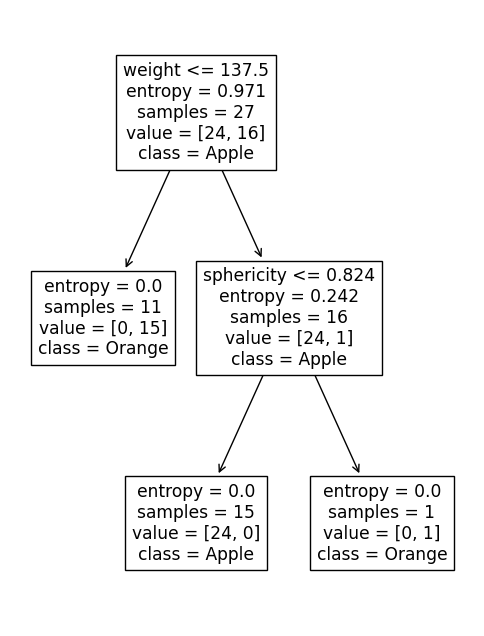

In [19]:
plt.figure(figsize=[6,8])
plot_tree(estimators[4], feature_names=X.columns, class_names=["Apple", "Orange"])
plt.show()

In [20]:
model = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=5, bootstrap=True, max_samples=45)
model.fit(X,y)

BaggingClassifier(estimator=KNeighborsClassifier(), max_samples=45,
                  n_estimators=5)

In [21]:
model.estimators_

[KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier()]

In [22]:
model.estimators_samples_

[array([26,  7, 35, 39, 18, 25, 27, 42,  5, 34, 55, 40,  5, 44, 52, 14,  2,
        44,  3, 52, 34, 39, 22, 26, 21,  2, 33, 23, 54, 40, 29, 15, 35, 55,
        19, 53, 39, 57, 16, 27, 43, 32, 53, 27, 11]),
 array([29, 22, 31, 31, 56, 29, 15, 38,  9, 44, 56, 45, 58, 38, 49, 20, 22,
         0, 58, 29, 49, 11,  6, 12, 58, 43, 31, 53, 37,  7,  1, 30, 50, 26,
        18, 54, 25, 59, 46, 21,  5, 57,  3, 51, 13]),
 array([40, 33, 10,  0, 19, 13, 12, 21, 14,  3, 51, 32, 53, 52, 10, 47,  7,
        19, 13, 47, 10, 58, 11, 15, 24, 58,  2, 55, 13, 24, 59, 52, 37, 47,
        49, 52, 54,  3, 45,  4, 14, 37, 32, 45, 59]),
 array([ 0, 34, 53, 32, 35,  4, 29, 33, 29, 18, 19, 37, 40, 10, 31, 56, 25,
         1, 17, 35,  2, 59,  0, 19,  1, 43, 18, 46, 47, 37, 44, 10,  1, 55,
        54, 31,  4,  3, 40, 53, 57, 19, 23, 50, 16]),
 array([29, 56,  1, 43, 40, 22,  2, 12, 17, 21, 28, 12, 57,  5, 52, 15,  4,
        54, 55, 47, 40,  3, 18, 13, 35,  3, 47,  3, 54, 56, 41,  8, 16, 41,
         0, 52, 30, 59, 